In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/home/briggsc1-erau.edu/Downloads/housing.csv')

In [3]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income']
target = ['median_house_value']
df = df.dropna(subset = features+target)

In [5]:
# 60-20-20 split
x_tr,x_te,y_tr,y_te = train_test_split(df[features],df[target],test_size = 0.4,random_state = 0)
x_va,x_te,y_va,y_te = train_test_split(x_te,y_te,test_size = 0.5,random_state = 0)

In [51]:
tr = DecisionTreeClassifier()
tr.fit(x_tr,y_tr)
tr.score(x_va,y_va)
# we've used a classifier (predicts categorical outcome) on a continuous target var (use regressor)

0.029850746268656716

In [7]:
tr.score(x_tr,y_tr)

1.0

In [54]:
tr.get_depth()

34

In [9]:
tr.get_n_leaves()

11264

In [53]:
tr = DecisionTreeRegressor(random_state = 0)
tr.fit(x_tr,y_tr)
tr.score(x_tr,y_tr)
tr.score(x_va,y_va)

0.5958932185571749

In [34]:
sum((y_tr['median_house_value'] - np.mean(y_tr['median_house_value']))**2)/len(y_tr)

13265159717.490282

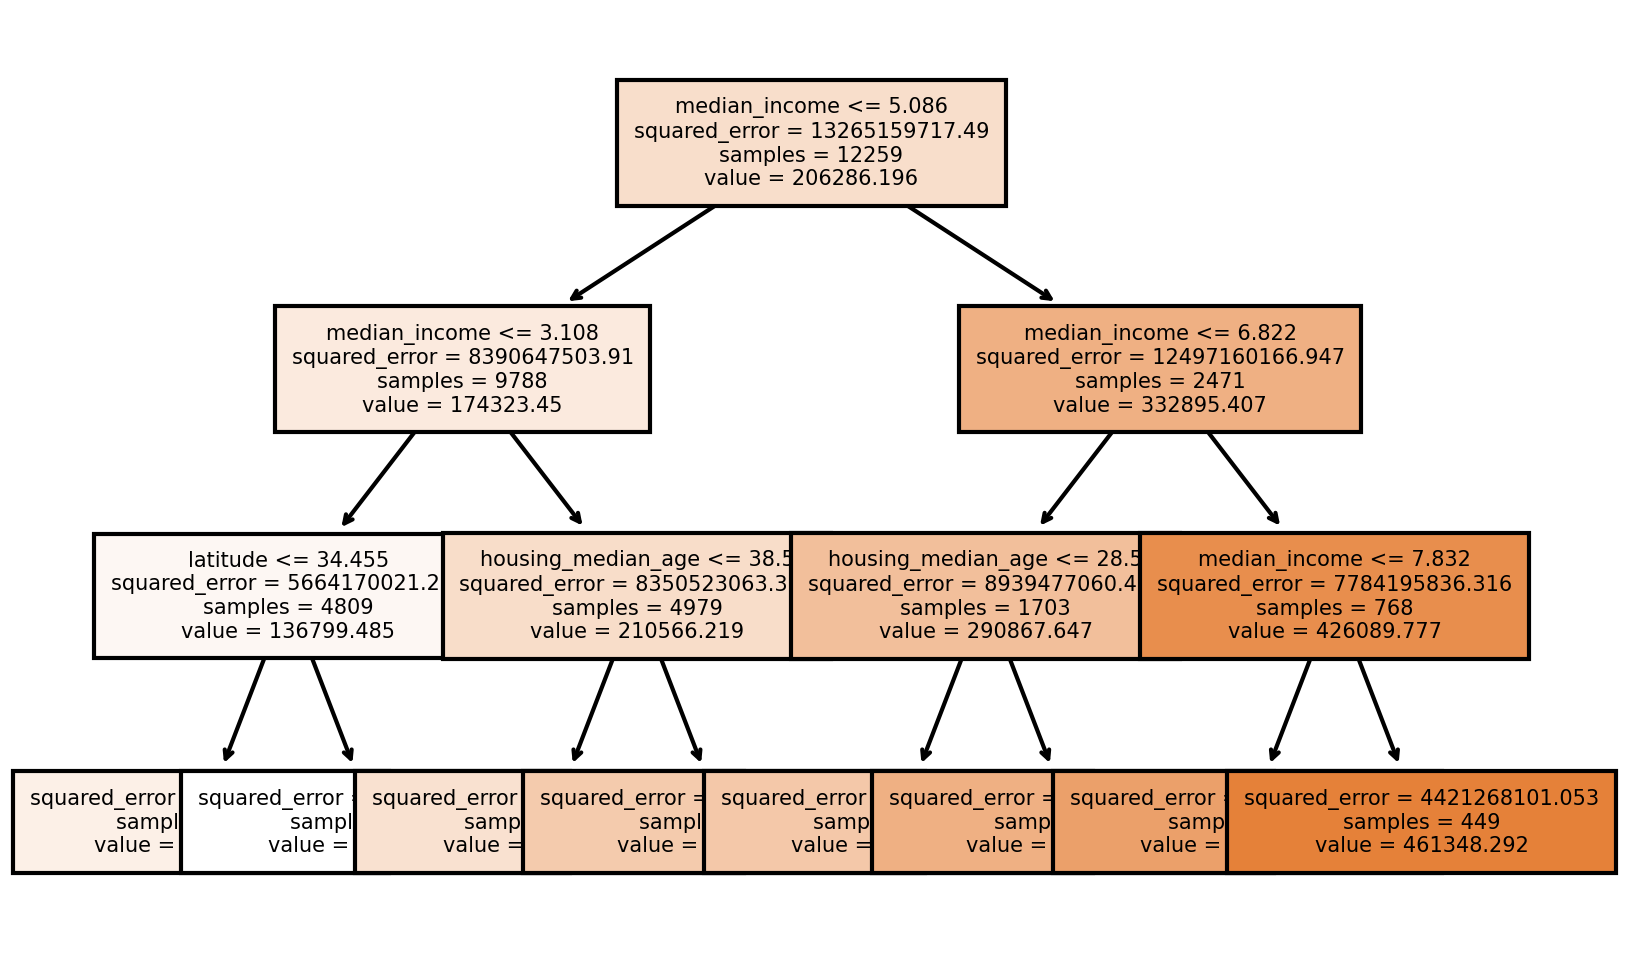

In [25]:
tr = DecisionTreeRegressor(max_depth = 3,random_state = 0)
tr.fit(x_tr,y_tr)
tr.score(x_tr,y_tr)
tr.score(x_va,y_va)
fig,ax = plt.subplots(dpi = 300)
plot_tree(tr,filled = True,feature_names = features,fontsize = 5);

In [48]:
new_y = y_tr[x_tr['median_income']<=5.086]['median_house_value'] # get the target variable values where median_income is <= 5.086
np.sum((new_y - np.mean(new_y))**2)/len(new_y)

8391498575.216531

In [49]:
np.mean(new_y)

174324.24941248595

In [63]:
# optimize max_depth
acc_tr =[]
acc_val = []
n_leaves = []
for i in range(1,35):
    tr = DecisionTreeRegressor(max_depth = i,random_state = 0)
    tr.fit(x_tr,y_tr)
    n_leaves.append(tr.get_n_leaves())
    acc_tr.append(tr.score(x_tr,y_tr))
    acc_val.append(tr.score(x_va,y_va))

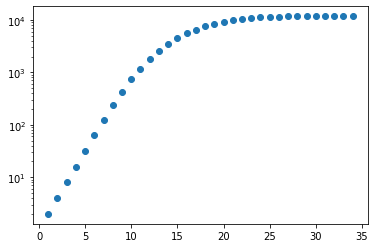

In [66]:
plt.scatter(range(1,35),n_leaves)
plt.yscale('log');

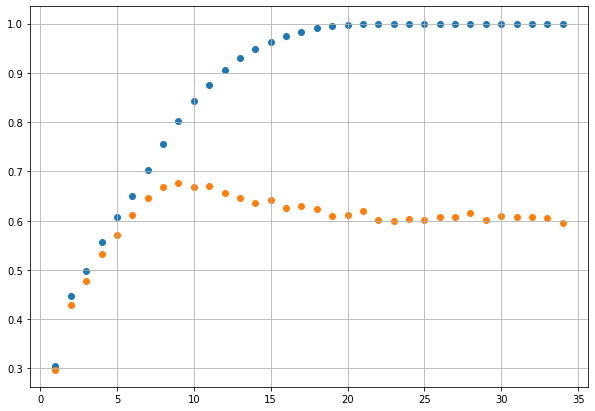

In [61]:
fig,ax = plt.subplots(figsize = (10,7))
plt.scatter(range(1,35),acc_tr)
plt.scatter(range(1,35),acc_val)
plt.grid();


In [62]:
tr = DecisionTreeRegressor(max_depth = 9,random_state = 0)
tr.fit(x_tr,y_tr)
# acc_tr.append(tr.score(x_tr,y_tr))
print(tr.score(x_te,y_te))

0.6915261915415354


At the top node, we see a guess of about 206k. That's because the mean target variable value in the training set is 206k. The first question is whether median_income is <=\$50,860. Line 2 is avg squared err:

$(\sum(y_i - y_{ave})^2)\;/\;len(y)$